# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [133]:
GROUP_NO = 100 # group number
GROUP_MEMBERS = {
    419866: "Shiyao Ju", # mat. no. : name,
    449970: "Shuo Sun",
    433193: "Yujie Chen",
}

---

In [134]:
# required imports
# please do not edit!
import pandas as pd
import pm4py
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Process Mining (23 points)
Your "Introduction into Data Science" course at the PADS chair has made you curious about Process Mining. 
You decide that you want to get a deeper understanding of the learned concepts. To do so, you use PM4Py - the documentation of this library can be found at: [PM4Py documentation](https://pm4py.fit.fraunhofer.de/static/assets/api/2.7.5/api.html)

## Part I: Implementation of Core Concepts (8 points)

You find an event log describing how the individual groups of the second part of the IDS Assignment two years ago approached the tasks, as a CSV file called **event_log_pt1.csv**. 
Your friend points out that this seems like an ideal log to implement the things you learned in lecture on an easy-to-understand log.

#### a)
You begin by loading the event log into a variable called `log_groups`. 
The event log should be imported as a pandas dataframe which is a PM4Py suitable data format and compute the following variables:
* `case_count`: How many groups took Part II of the assignment in Wintersemester 2021/2022?
* `activity_count`: How many unique activities were logged? 



In [135]:
df = pd.read_csv('./datasets/q3_event_log_pt1.csv', sep=',')
log_groups = pm4py.format_dataframe(df, case_id='Group Number', activity_key='Activity', timestamp_key='Timestamp')
case_count = df['Group Number'].nunique()
activity_count = df['Activity'].nunique()

print(f"Number of groups in Wintersemester 2021/2022: {case_count}")
print(f"Number of unique activities logged: {activity_count}")

Number of groups in Wintersemester 2021/2022: 516
Number of unique activities logged: 8


Given the low number of activities, you decide to plot the directly-follows graph and manually detect the first cut the Inductive Miner would apply.

#### b)
Use PM4Py to create the directly follows graph, using `dfg` as variable name for the graph structure, `start_act` as variable name for the start activities, and `end_act` for the final activities. Show the directly-follows graph.


In [136]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_groups)
pm4py.view_dfg(dfg, start_activities, end_activities)

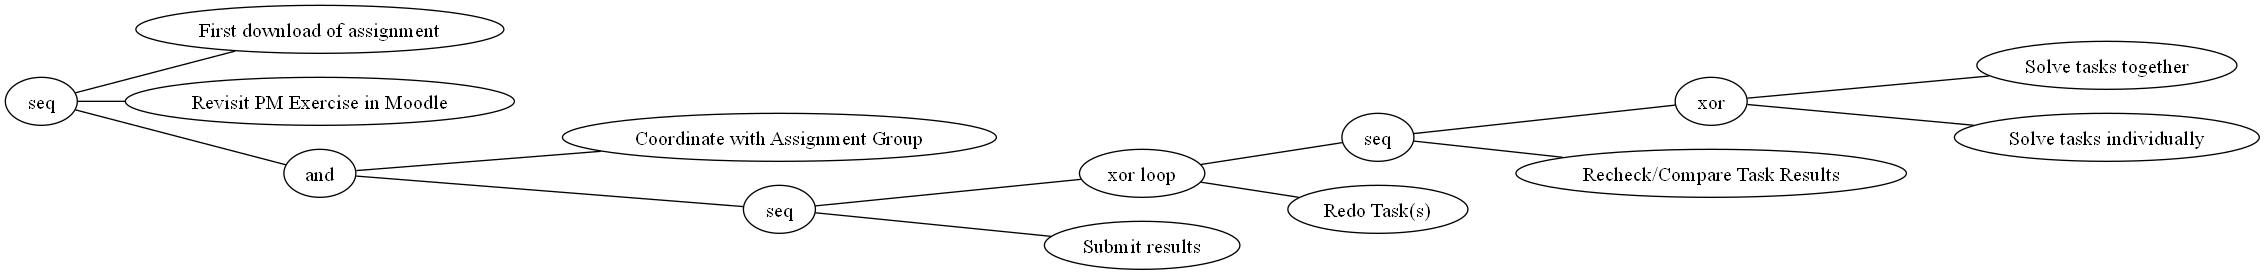

In [137]:
tree = pm4py.discover_process_tree_inductive(log_groups)
pm4py.view_process_tree(tree)

#### c)
Based on the DFG, name the first type of cut that is identified by the Inductive Miner. Briefly explain why this is the correct cut.

*Hint: You can of course also use other functionalities of PM4Py to identify the cut. Nevertheless, your submitted notebook is expected to contain the DFG.*


__Student Answer:__ The first cut type is a sequence cut. The requirement for sequence cuts is for every a in a partition "earlier" than b's partition: b must be reachable from every a, and there can be no path from b back to a. Therefore, sequence cuts are appropriate as the first cuts.

#### d)
Give the activity-partitions as a list and store it into a variable called `first_cut_partitions`. This list should include at least two sets containing only activity names (no start or end).
Note, that the number of partitions depends on the maximum cut you identified.

For example, `[{"c","d"}, {"a","b"}]` indicates two partitions: one with a and b and the other with c and d.

In [138]:
activity_names = ['Revisit PM Exercise in Moodle', 'Solve tasks individually', 'Recheck/Compare Task Results', 'Redo Task(s)', 'Solve tasks together']
max_cut = 5
cut_length = len(activity_names) // max_cut
remainder = len(activity_names) % max_cut 
start = 0
first_cut_partitions = []
for i in range(max_cut):
    end = start + cut_length + (1 if i < remainder else 0)
    first_cut_partitions.append(set(activity_names[start:end]))
    start = end

print(first_cut_partitions)


[{'Revisit PM Exercise in Moodle'}, {'Solve tasks individually'}, {'Recheck/Compare Task Results'}, {'Redo Task(s)'}, {'Solve tasks together'}]


#### e)
Having identified the cut, split the event log accordingly. 
Create five variables, called `sub_log_groups1`, `sub_log_groups2`, `sub_log_groups3`, `sub_log_groups4`, and `sub_log_groups5`. 
Create the sublog for each of your identified partitions and store it in one of the variables. Assign `None` to all variables you don't use.

In [139]:
sub_log_groups1 = pm4py.filter_event_attribute_values(log_groups, "concept:name", first_cut_partitions[0], level='event', retain=True) # either sublog (aka dataframe) or None
sub_log_groups2 = pm4py.filter_event_attribute_values(log_groups, "concept:name", first_cut_partitions[1], level='event', retain=True) # either sublog (aka dataframe) or None
sub_log_groups3 = pm4py.filter_event_attribute_values(log_groups, "concept:name", first_cut_partitions[2], level='event', retain=True) # either sublog (aka dataframe) or None
sub_log_groups4 = pm4py.filter_event_attribute_values(log_groups, "concept:name", first_cut_partitions[3], level='event', retain=True) # either sublog (aka dataframe) or None
sub_log_groups5 = pm4py.filter_event_attribute_values(log_groups, "concept:name", first_cut_partitions[4], level='event', retain=True) # either sublog (aka dataframe) or None

In [140]:
# Please leave this cell empty - used for grading.

 ## Part II: Generating Process Insights (16 Points)  
After having applied some of the learned process mining techniques to a proper event log, you notice that you enjoy working with event data and feel a lot more confident with your skills. 
For this reason, you decide to found a student association to offer students the opportunity to gain experience in Process Mining by executing projects with non-profit organisations and communal services. 
Your first project is with the municipality to evaluate how they deal with filed requests from citizens.

#### a)
Load the municipality's fully anonymized event log **q3_event_log_pt2.xes** into a variable called `sa_log` using PM4Py and display the first 20 rows of the dataframe. 
Create and display the following statistics and save them in the corresponding variable names:  
* `sa_event_count` The number of events in the log.  
* `sa_case_count`: The number of cases in the log.

In [141]:
sa_log = pm4py.read_xes('./datasets/q3_event_log_pt2.xes')

sa_event_count = len(sa_log)
sa_case_count = len(sa_log['case:concept:name'].unique())

print(f"The number of events in the log: {sa_event_count}")
print(f"The number of cases in the log: {sa_case_count}")

parsing log, completed traces ::   0%|          | 0/4580 [00:00<?, ?it/s]

The number of events in the log: 21348
The number of cases in the log: 4580


#### b)
First, look at the individual variants in the log. 
Create an overview of trace variants in the event log as a dictionary called `sa_variants`. 
Each entry should contain the following: 
* Key: A tuple of activity names representing the trace variant,
* Value: The number of occurrences of this variant in the log. 

Additionally, answer the following questions and indicate their answers in the variables as described below:
* `start_activities`: What is the set of start activity names found in the log?
* `end_activities`: What is the set of end activity names found in the log?
* `sa_variant_count`: How many trace variants does the event log contain?

In [142]:
start_activities= pm4py.get_start_activities(sa_log)

print('The start activities are:')
print(start_activities)

end_activities = pm4py.get_end_activities(sa_log)

print('The end activities are:')
print(end_activities)

sa_variants = pm4py.get_variants_as_tuples(sa_log)

print(f"The number of trace variants in the log: {len(sa_variants)}")

The start activities are:
{'Assign priority': 4384, 'Insert request': 118, 'Begin resolving': 74, 'Notify citizen about resolution': 2, 'Begin anomaly investigation of provided data': 1, 'Inquire further information form other municipality': 1}
The end activities are:
{'Archive request': 4557, 'Notify citizen about resolution': 10, 'Inquire further information form other municipality': 8, 'Escalate': 3, 'Verify provided data': 1, 'Begin resolving': 1}
The number of trace variants in the log: 226


#### d)
You notice that more than half of the activities in the log are either start or end activities and take this as an indicator for noisy data.
Create a new filtered event log `log_archived_frequent`, which only contains variants containing at least 2% of cases in log and in which the request and resolution are archived. 
How many variants does this log contain? Display your answer and store it in `variants_archived_frequent_count`. How many cases does this sub-log contain (`cases_archived_frequent_count`)? 

In [143]:
filtered_log = pm4py.filter_end_activities(sa_log, ["Archive request"])
log_archived_frequent = pm4py.filter_variants_by_coverage_percentage(filtered_log, 0.02)
variants_archived_frequent_count = pm4py.get_variants_as_tuples(log_archived_frequent)
cases_archived_frequent_count = log_archived_frequent['case:concept:name'].unique()

print(f"The number of trace variants in the log: {len(variants_archived_frequent_count)}")
print(f"The number of cases in the log: {len(cases_archived_frequent_count)}")

The number of trace variants in the log: 6
The number of cases in the log: 3632


#### e)
Use the Inductive Miner to discover a Petri net from this event log annotated with frequencies and display it. How often are citizens informed twice about the resolution of their request?

In [144]:
from pm4py.visualization.petri_net import visualizer as pn_visualizer

net, im, fm = pm4py.discover_petri_net_inductive(log_archived_frequent)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_archived_frequent)
pn_visualizer.view(gviz)

c:\Users\82159\anaconda3\envs\env-ids-ws23\lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = strpfromiso.fix_dataframe_column(df[col])


replaying log with TBR, completed variants ::   0%|          | 0/6 [00:00<?, ?it/s]

i) How often are citizens informed several times about the resolution of their request?

In [145]:
filtered = pm4py.filter_eventually_follows_relation(log_archived_frequent, [('Notify citizen about resolution', 'Notify citizen about resolution')])
several_resolution_count = len(filtered['case:concept:name'].unique())
print(f"The number of times Citizens has been informed several times is: {several_resolution_count}")

The number of times Citizens has been informed several times is: 109


ii) In how many of these cases do you expect the citizens to receive the exact same letter twice? Explain your answer.
*Hint: Use the filtered log to answer this question*


In [132]:
grouped_by_case = filtered.groupby('case:concept:name')
duplicate_counts = 0

for case_name, group_data in grouped_by_case:
    duplicates_count = group_data['time:timestamp'].duplicated().sum()
    duplicate_counts = duplicate_counts + duplicates_count

print("The number of times Citizens receive the exact same letter twice is:", duplicate_counts)

The number of times Citizens receive the exact same letter twice is: 45


__Student Answer:__ The number of times Citizens receive the exact same letter twice is 45. We can tell if they are receiving the same letter based on whether it is received at the same time in the same case.

#### g)
Assess how well this model represents all traces in the log. Compute the token-based replay fitness on the event log `sa_log`. 
Store the log's fitness in a variable called `log_fitness` and display the value.

In [146]:
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
aligned_traces = alignments.apply_log(sa_log, net, im, fm)

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
log_fitness = replay_fitness.evaluate(aligned_traces, variant=replay_fitness.Variants.ALIGNMENT_BASED)

print(log_fitness)

aligning log, completed variants ::   0%|          | 0/226 [00:00<?, ?it/s]

{'percFitTraces': 86.24454148471615, 'averageFitness': 0.9798045256645621, 'percentage_of_fitting_traces': 86.24454148471615, 'average_trace_fitness': 0.9798045256645621, 'log_fitness': 0.9766377849856904}


#### h)
Before being contempt with the achieved fitness, you want to consider how the fitness is distributed over the individual traces.

i. Create a histogram of the token-based replay fitness given the individual diagnostics of all traces and use the provided `bins`.
Save the diagnostics of the replay in a variable called `replayed_traces`.

replaying log with TBR, completed variants ::   0%|          | 0/226 [00:00<?, ?it/s]

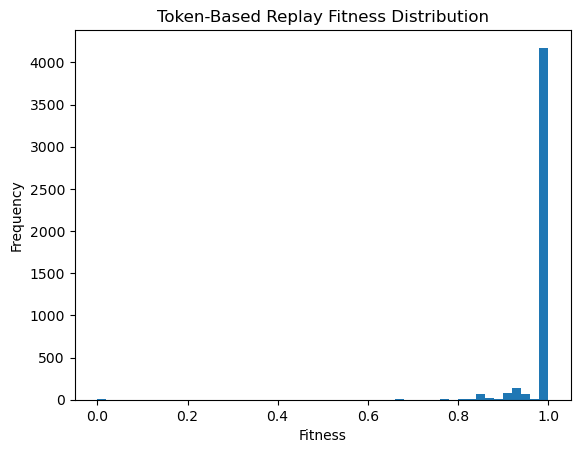

In [152]:
bins = np.arange(0, 1.02, 0.02)

replayed_traces =  pm4py.conformance_diagnostics_token_based_replay(sa_log, net, im, fm)
fitness_values = [diag['trace_fitness'] for diag in replayed_traces]

plt.hist(fitness_values, bins)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title('Token-Based Replay Fitness Distribution')
plt.show()

ii. How high is the percentage of traces with full fitness? Save you answer in a variable called `percentage_traces_full_fitness`.

In [157]:
percentage_traces_full_fitness = (fitness_values.count(1.0)/ len(fitness_values)) * 100

print(f"The percentage of traces with full fitness is: {percentage_traces_full_fitness}%")

The percentage of traces with full fitness is: 91.15720524017468%


#### i) (4 points) 
Processing speed is always an issue for municipalities. 
Compute the average throughput time in days of all variants in "log_archived_frequent" in a dictionary called `average_throughput`.
Each entry uses the variant as key and the average throughput time as value. 
Which trace variant is the fastest (store the entry describing this variant in a variable called `fastest_variant`)? 
Respectively, which is the slowest (store its entry in `slowest_variant`)?

In [158]:
var_paths_durs = pm4py.stats.get_variants_paths_duration(log_archived_frequent)
grouped = (var_paths_durs.groupby('@@variant_column')['@@flow_time'].sum() / var_paths_durs.groupby('@@variant_column')['@@flow_time'].count()) / (60 * 60 * 24)
average_throughput = grouped.to_dict()
fastest_variant = min(average_throughput, key=average_throughput.get)
slowest_variant = max(average_throughput, key=average_throughput.get)

print(f"Fastest Variant: {fastest_variant} - Average Throughput Time: {average_throughput[fastest_variant]:.2f} days")
print(f"Slowest Variant: {slowest_variant} - Average Throughput Time: {average_throughput[slowest_variant]:.2f} days")

Fastest Variant: ('Assign priority', 'Begin resolving', 'Inquire further information form other municipality', 'Begin resolving', 'Notify citizen about resolution', 'Archive request') - Average Throughput Time: 8.48 days
Slowest Variant: ('Assign priority', 'Notify citizen about resolution', 'Archive request') - Average Throughput Time: 19.63 days
